## Categorical Variables

### Types of categorical variables:

- **Binary variables**: Which contain only two different values which can be represented as 0/1


- **Categorical variables**: Which can only contain a finite number of values. For ex. Days of a week(1-7)


- **Ordinal variables**: Which contain values having intrinsic ordinal relationship. For ex. values like low, medium, high.


- **Nominal variables**: Categorical variables which have no numerical importance.


- **Temporal Varibales**: Categorical variables which have timeseries values. For ex. Date or timestamp.

## Methods of Encoding

1. **Label Encoding**

2. **Onehot Encoding**

3. **Target Encoding**

4. **K-fold Encoding**

5. **Cyclic Encoding**

In [ ]:
pd.read_csv("/home/vivek/Downloads/kaggle/data-science-bowl-2018/")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from kaggler.preprocessing import LabelEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from kaggler.metrics import auc
from kaggler.model import AutoLGB
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vivek/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/vivek/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dt

In [2]:
data_dir= '/home/vivek/Downloads/kaggle/Encoding_challenge/'

train= pd.read_csv(data_dir+"train.csv")
X= train.copy()
test= pd.read_csv(data_dir+"test.csv")
sample= pd.read_csv(data_dir+"sample_submission.csv")
y_train= train.target

train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


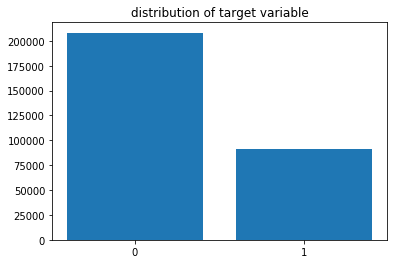

In [3]:
x=y_train.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

In [4]:
train.nunique()

id        300000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5        222
nom_6        522
nom_7       1220
nom_8       2215
nom_9      11981
ord_0          3
ord_1          5
ord_2          6
ord_3         15
ord_4         26
ord_5        192
day            7
month         12
target         2
dtype: int64

In [5]:
test.nunique()

id       200000
bin_0         2
bin_1         2
bin_2         2
bin_3         2
bin_4         2
nom_0         3
nom_1         6
nom_2         6
nom_3         6
nom_4         4
nom_5       222
nom_6       522
nom_7      1219
nom_8      2214
nom_9     11839
ord_0         3
ord_1         5
ord_2         6
ord_3        15
ord_4        26
ord_5       192
day           7
month        12
dtype: int64

### Method 1: Label Encoding

This method is one of the most common ways of encoding categorical features. It encodes every categorical value to a number. The problem with this method is, since there are different numbers in the same column, the model will misunderstand the data to be in some kind of order, 0 < 1 <2.

Let's fit a model with this method of encoding using sklearn's **LabelEncoder** module

In [6]:
from sklearn.preprocessing import LabelEncoder

train.drop(['id','target'], axis= 1, inplace= True)

label=LabelEncoder()
for c in  train.columns:
    if(train[c].dtype=='object'):
        train[c]=label.fit_transform(train[c])
    else:
        train[c]=train[c]
        
train.head(3)

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,1,1,1,5,5,3,0,...,1686,2175,2,2,1,7,3,136,2,2
1,0,1,0,1,1,1,4,3,5,2,...,650,11635,1,2,3,0,0,93,7,8
2,0,0,0,0,1,0,4,4,5,3,...,1932,8078,1,1,4,7,17,31,7,2


#### There is no change in the number of columns, every categorical feature has been assigned numerical values

In [7]:
def logistic(train,target):
    X_train,X_test,y_train,y_test=train_test_split(train,target,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    print('Roc Score : ',auc(y_test,y_pre))

In [10]:
logistic(train,y_train)

Roc Score :  0.5855530036704585


### Method 2: Onehot Encoding

To overcome the problem posed by labelencoding, we use One Hot Encoder. This is the most widely used method for encoding categorical variables which takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column.
This method does not work well with high cardinality features which explodes the number of dimentions.

Let's fit a model with this method using **get_dummies** method of pandas. Sklearn's **OnehotEncoder** module can also be used which produces a sparse matrix saving memory/cpu usage.

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
one=OneHotEncoder()

one.fit(train)
train=one.transform(train)

print('Data has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

Data has 300000 rows and 16461 columns


In [13]:
logistic(train,y_train)

Roc Score :  0.6814847406245804


### Method 3: Target Encoding

This is a method of encoding categorical variables using the target variable. In this method, we replace each categorical value of the feature with it's corresponding probability of the target or average of the target. Due to it's dependency on the target variable, this method may add bias to the model resulting in lower accuracy on the unseen data. This method should be used with regularization for best results.

In [10]:
te = TargetEncoder(smoothing=1, min_samples=50)
features= X.drop(['id','target'], axis= 1).columns


te_train= te.fit_transform(X[features], y_train)
te_train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.305495,0.329946,0.301541,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,0.237743,...,0.372694,0.305880,0.334688,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432
1,0.305495,0.236159,0.301541,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,0.304164,...,0.189189,0.305880,0.278168,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496
2,0.305495,0.329946,0.301541,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,0.353951,...,0.223022,0.305880,0.278168,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432
3,0.305495,0.236159,0.301541,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,0.329472,...,0.325123,0.305686,0.278168,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729
4,0.305495,0.329946,0.301541,0.309384,0.333773,0.351052,0.290054,0.293085,0.339793,0.329472,...,0.376812,0.305880,0.278168,0.403885,0.225214,0.206599,0.351864,0.404345,0.340292,0.327496


In [15]:
logistic(te_train,y_train)

Roc Score :  0.6855656893635703


### Method 4: K-Fold Target Encoding

This method is similar to Target encoding but does the encoding with the use of cross-fold validation to keep overfitting in check. We divide the dataset into k-folds and then follow the same principle as target encoding with all the folds except one.

In [11]:
X_fold=X.copy()

X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})

features= X_fold.drop(['id','target'], axis= 1).columns

kf = StratifiedKFold(n_splits = 5, random_state=2019)
te = TargetEncoder(smoothing=1, min_samples=50, cv= kf)

te_train= te.fit_transform(X_fold[features], y_train)
te_train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0.305675,0.330001,0.301622,0.302814,0.289914,0.327296,0.360200,0.305875,0.241660,0.237009,...,0.380090,0.30588,0.334888,0.403455,0.259020,0.306914,0.211418,0.412888,0.323428,0.244489
1,0.305675,0.236070,0.301622,0.302814,0.289914,0.327296,0.290476,0.358022,0.289430,0.304511,...,0.195402,0.30588,0.278320,0.403455,0.327740,0.208172,0.185592,0.293144,0.341673,0.327174
2,0.305675,0.330001,0.301622,0.309082,0.289914,0.242106,0.290476,0.293826,0.289430,0.355813,...,0.224771,0.30588,0.278320,0.316665,0.402080,0.306914,0.354919,0.208748,0.341673,0.244489
3,0.305675,0.236070,0.301622,0.309082,0.289914,0.350488,0.290476,0.305875,0.340749,0.328602,...,0.269006,0.30588,0.278320,0.403455,0.361015,0.330429,0.211418,0.358066,0.323428,0.255723
4,0.305675,0.330001,0.301622,0.309082,0.334126,0.350488,0.290476,0.293826,0.340749,0.328602,...,0.364780,0.30588,0.278320,0.403455,0.225237,0.208172,0.354919,0.409886,0.341673,0.327174


In [18]:
logistic(te_train,y_train)

Roc Score :  0.6374026779425612


### Method 5: Cyclic Encoding

Some features like days of a week, months etc. are cyclical in nature commonly found in the datasets for modelling across a range of applications.

This method encodes these features by transforming them into two dimensions using a sine and consine transformation.



In [12]:
X_cyclic=X.copy()
X_cyclic.drop(['id','target'], axis= 1, inplace= True)

columns=['day','month']
for col in columns:
    X_cyclic[col+'_sin']=np.sin((2*np.pi*X_cyclic[col])/max(X_cyclic[col]))
    X_cyclic[col+'_cos']=np.cos((2*np.pi*X_cyclic[col])/max(X_cyclic[col]))
X_cyclic=X_cyclic.drop(columns,axis=1)

X_cyclic[['day_sin','day_cos']].head()

,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000
3,9.749279e-01,-0.222521
4,-2.449294e-16,1.000000


In [13]:
onehot=OneHotEncoder()

onehot.fit(X_cyclic)
train_df=onehot.transform(X_cyclic)

In [25]:
logistic(train_df,y_train)

Roc Score :  0.6814214614425244


### Conclusion:

- For comparing among different encoding methods for categorical features, I ran a simple logistic model for each methods and calculating ROC score for each.

- It seems that Target Encoding had the highest score but Onehot Encoding and Cyclic + Onehot Encoding have comparable scores.
- Also the type of encoding to be used depends on number of other factors like type of algorithm used for modelling, type of problem to be solved etc. but now we know the possible efficient methods  or a combination of them we can use to improve our model performance.

- Now let's choose one of the encoding and use it with a more powerful algorithm to see the results.